# Training Deep Neural Networks

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Vanishing/Exploding Gradients Problem

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))


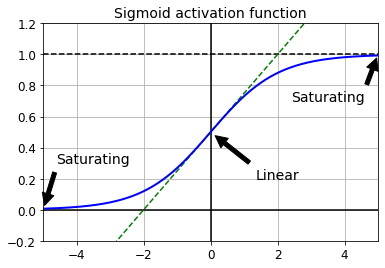

In [12]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [1, 1], "k--")

plt.plot([0, 0], [-0.2, 1.2], "k-")
plt.plot([-5, 5], [-3 / 4, 7 / 4], "g--")

plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor="black", shrink=0.1)

plt.annotate(
    "Saturating",
    xytext=(3.5, 0.7),
    xy=(5, 1),
    arrowprops=props,
    fontsize=14,
    ha="center",
)

plt.annotate(
    "Saturating",
    xytext=(-3.5, 0.3),
    xy=(-5, 0),
    arrowprops=props,
    fontsize=14,
    ha="center",
)

plt.annotate(
    "Linear",
    xytext=(2, 0.2),
    xy=(0, 0.5),
    arrowprops=props,
    fontsize=14,
    ha="center",
)

plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()


## Xavier and He Initialization

In [14]:
[name for name in dir(keras.initializers) if not name.startswith("_")]


['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [15]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")


In [16]:
init = keras.initializers.VarianceScaling(
    scale=2.0, mode="fan_avg", distribution="uniform"
)
keras.layers.Dense(10, activation="relu", kernel_initializer=init)


## Nonsaturating Activation Functions

In [22]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)


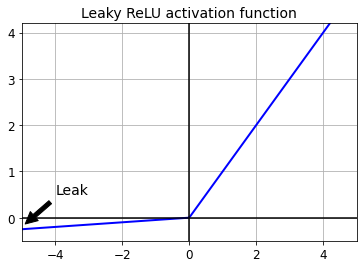

In [23]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([0, 0], [-0.5, 4.2], "k-")
plt.grid(True)
props = dict(facecolor="black", shrink=0.1)
plt.annotate(
    "Leak",
    xytext=(-3.5, 0.5),
    xy=(-5, -0.2),
    arrowprops=props,
    fontsize=14,
    ha="center",
)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()


In [24]:
[m for m in dir(keras.activations) if not m.startswith("_")]


['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [25]:
[m for m in dir(keras.layers) if "relu" in m.lower()]


['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [28]:
(X_train_full, y_train_full), (
    X_test,
    y_test,
) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [29]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, kernel_initializer="he_normal"),
        keras.layers.LeakyReLU(),
        keras.layers.Dense(100, kernel_initializer="he_normal"),
        keras.layers.LeakyReLU(),
        keras.layers.Dense(10, activation="softmax"),
    ]
)


2022-03-24 10:25:39.637830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 10:25:39.705191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 10:25:39.705465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-24 10:25:39.706826: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

In [32]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"],
)


In [33]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy:

In [34]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, kernel_initializer="he_normal"),
        keras.layers.PReLU(),
        keras.layers.Dense(100, kernel_initializer="he_normal"),
        keras.layers.PReLU(),
        keras.layers.Dense(10, activation="softmax"),
    ]
)


In [35]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"],
)


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6966 - accuracy: 0.7694 - val_loss: 0.6565 - val_accuracy: 0.7880
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8048
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8178
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5618 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

## Batch Normalization

In [43]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation="softmax"),
    ]
)


In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_5 (Batc  (None, 100)             

In [45]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]


[('batch_normalization_3/gamma:0', True),
 ('batch_normalization_3/beta:0', True),
 ('batch_normalization_3/moving_mean:0', False),
 ('batch_normalization_3/moving_variance:0', False)]

In [46]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"],
)


In [47]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8465 - accuracy: 0.7180 - val_loss: 0.5549 - val_accuracy: 0.8134
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5743 - accuracy: 0.8020 - val_loss: 0.4757 - val_accuracy: 0.8368
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5178 - accuracy: 0.8197 - val_loss: 0.4405 - val_accuracy: 0.8524
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4801 - accuracy: 0.8330 - val_loss: 0.4184 - val_accuracy: 0.8580
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4566 - accuracy: 0.8394 - val_loss: 0.4025 - val_accuracy: 0.8616
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.3908 - val_accuracy: 0.8670
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4256 - accuracy: 0.8511 - val_loss: 0.3807 - val_accuracy:

## Gradient Clipping

In [49]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

## Reusing Pretrained Layers

In [53]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6)  # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2  # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(
        np.float32
    )  # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))


(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

# Only a small number of data for set B
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]


In [54]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))

for n_hidden in (300, 100, 50, 50, 50):
	model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))


In [55]:
model_A.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"],
)


In [56]:
history = model.fit(
    X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A)
)


Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.4382 - accuracy: 0.8607 - val_loss: 0.2939 - val_accuracy: 0.9051
Epoch 2/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.3091 - accuracy: 0.8971 - val_loss: 0.2691 - val_accuracy: 0.9113
Epoch 3/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2860 - accuracy: 0.9057 - val_loss: 0.2568 - val_accuracy: 0.9170
Epoch 4/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2744 - accuracy: 0.9084 - val_loss: 0.2481 - val_accuracy: 0.9190
Epoch 5/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2648 - accuracy: 0.9124 - val_loss: 0.2404 - val_accuracy: 0.9230
Epoch 6/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2549 - accuracy: 0.9153 - val_loss: 0.2384 - val_accuracy: 0.9218
Epoch 7/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.2476 - accuracy: 0.9157 - val_loss: 0.2330 - val_accuracy:

In [57]:
model_A.save("./models/my_model_A.h5")

In [58]:
model_B = keras.models.Sequential()

model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
	model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [59]:
model_B.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"],
)


In [60]:
history = model_B.fit(
    X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B)
)


Epoch 1/20
7/7 [==============================] - 1s 43ms/step - loss: 0.8671 - accuracy: 0.4650 - val_loss: 0.6258 - val_accuracy: 0.6359
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5619 - accuracy: 0.7650 - val_loss: 0.4965 - val_accuracy: 0.8185
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 0.4569 - accuracy: 0.8850 - val_loss: 0.4278 - val_accuracy: 0.8763
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3953 - accuracy: 0.9150 - val_loss: 0.3786 - val_accuracy: 0.9067
Epoch 5/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3499 - accuracy: 0.9350 - val_loss: 0.3397 - val_accuracy: 0.9351
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3128 - accuracy: 0.9450 - val_loss: 0.3081 - val_accuracy: 0.9452
Epoch 7/20
7/7 [==============================] - 0s 21ms/step - loss: 0.2834 - accuracy: 0.9650 - val_loss: 0.2837 - val_accuracy: 0.9554
Epoch 8/20
7/7 [===========

In [61]:
model_B.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 300)               235500    
                                                                 
 dense_21 (Dense)            (None, 100)               30100     
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 50)                2550      
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                                 
 dense_25 (Dense)            (None, 1)                

In [62]:
model_A = keras.models.load_model("./models/my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [63]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))


In [65]:
# Do not train the parameters of the model_A
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# The model must be compiled/re-compiled after freezing/unfreezing the layers
model_B_on_A.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"],
)


In [69]:
# Totally use 20 epochs! The reused layers are freezed for the first 4 epochs!

history = model_B_on_A.fit(
    X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B)
)

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

# Re-compile the model to unfreeze the reused layers!

model_B_on_A.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    metrics=["accuracy"],
)
history = model_B_on_A.fit(
    X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B)
)


Epoch 1/4
7/7 [==============================] - 0s 17ms/step - loss: 0.2953 - accuracy: 0.9400 - val_loss: 0.2921 - val_accuracy: 0.9422
Epoch 2/4
7/7 [==============================] - 0s 13ms/step - loss: 0.2590 - accuracy: 0.9550 - val_loss: 0.2621 - val_accuracy: 0.9493
Epoch 3/4
7/7 [==============================] - 0s 13ms/step - loss: 0.2302 - accuracy: 0.9650 - val_loss: 0.2383 - val_accuracy: 0.9554
Epoch 4/4
7/7 [==============================] - 0s 14ms/step - loss: 0.2080 - accuracy: 0.9850 - val_loss: 0.2176 - val_accuracy: 0.9615
Epoch 1/16
7/7 [==============================] - 1s 30ms/step - loss: 0.1882 - accuracy: 0.9850 - val_loss: 0.2015 - val_accuracy: 0.9686
Epoch 2/16
7/7 [==============================] - 0s 14ms/step - loss: 0.1725 - accuracy: 0.9850 - val_loss: 0.1876 - val_accuracy: 0.9746
Epoch 3/16
7/7 [==============================] - 0s 14ms/step - loss: 0.1592 - accuracy: 0.9850 - val_loss: 0.1757 - val_accuracy: 0.9797
Epoch 4/16
7/7 [===============

In [70]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9825


[0.13373036682605743, 0.9825000166893005]

In [71]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9915


[0.09580998867750168, 0.9915000200271606]

In [72]:
ret = (100 - 98.25) / (100 - 99.15)
print(ret)

2.0588235294117783


## Faster Optimizers

### Momentum Optimization

In [74]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)


### Nested Accelerated Gradient

In [75]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)


### AdaGrad

In [76]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)


## Learning Rate Scheduling

### Power Scheduling

In [78]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)


In [80]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
        keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)


In [82]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

n_epochs = 25

history = model.fit(
    X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid)
)


Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4885 - accuracy: 0.8269 - val_loss: 0.4058 - val_accuracy: 0.8622
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3821 - accuracy: 0.8653 - val_loss: 0.3739 - val_accuracy: 0.8732
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3494 - accuracy: 0.8762 - val_loss: 0.3755 - val_accuracy: 0.8698
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3287 - accuracy: 0.8829 - val_loss: 0.3536 - val_accuracy: 0.8762
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8874 - val_loss: 0.3457 - val_accuracy: 0.8774
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3004 - accuracy: 0.8925 - val_loss: 0.3463 - val_accuracy: 0.8808
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2908 - accuracy: 0.8963 - val_loss: 0.3400 - val_accuracy:

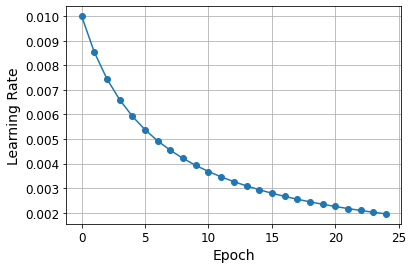

In [86]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32

n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, "o-")

plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid()
plt.show()


### Performance Scheduling

In [87]:
tf.random.set_seed(42)
np.random.seed(42)

In [88]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
        keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]
)
n_epochs = 25
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=n_epochs,
    validation_data=(X_valid_scaled, y_valid),
    callbacks=[lr_scheduler],
)


Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5900 - accuracy: 0.8070 - val_loss: 0.4986 - val_accuracy: 0.8528 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5007 - accuracy: 0.8379 - val_loss: 0.5817 - val_accuracy: 0.8376 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5140 - accuracy: 0.8413 - val_loss: 0.5169 - val_accuracy: 0.8544 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5163 - accuracy: 0.8470 - val_loss: 0.4977 - val_accuracy: 0.8528 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5228 - accuracy: 0.8495 - val_loss: 0.5352 - val_accuracy: 0.8482 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5214 - accuracy: 0.8515 - val_loss: 0.5244 - val_accuracy: 0.8578 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 3s

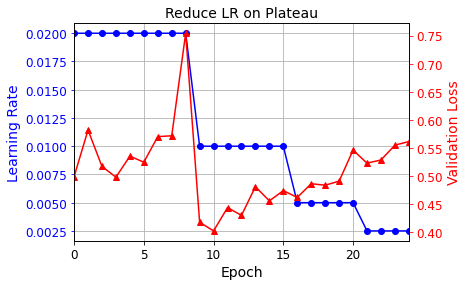

In [89]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color="b")
plt.tick_params("y", colors="b")
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel("Validation Loss", color="r")
ax2.tick_params("y", colors="r")

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()


## Avoid Overfitting Through Regulation

In [ ]:
from functools import partial

RegularizedDense = partial(
    keras.layers.Dense,
    activation="elu",
    kernel_initializer="he_normal",
    kernel_regularizer=keras.regularizers.l2(0.01),
)

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        RegularizedDense(300),
        RegularizedDense(100),
        RegularizedDense(10, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))